# <font color='red'>Parte 2 -  Limpeza dos Dados</font>
Nesta etapa veremos exemplos de como limpar os dados e prepara-los para uma análise exploratória.

O Foco desse notebook é puramene para a limeza dos dados.
###### Por: Marcus Rosa Godoi

# <font color='grey'>0.0 - IMPORTS</font>

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns



# <font color='grey'>1.0  - COLETAS DE DADOS</font>

Prevendo a Ocorrência de Diabetes.


Conjunto de Dados do Repositório de Machine Learning da UCI / Kaggle.


https://www.kaggle.com/uciml/pima-indians-diabetes-database/data

In [6]:
base2 = pd.read_csv("Dados/diabetes.csv")

## 1.1 - Verificação da Base de Dados

In [7]:
# Verificando o formato dos dados

print('Número de Linhas: {}'.format(base2.shape[0]))
print('Número de Colunas: {}'.format(base2.shape[1]))

Número de Linhas: 768
Número de Colunas: 9


In [8]:
# Varificando tipo dos dados

base2.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [137]:
# Verificando as primeiras linhas do dataset

base2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [139]:
# Verificando as últimas linhas do dataset

base2.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [16]:
# Verificando estatisticas básicas dos dados

base2.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# <font color='red'>2.0 - LIMPEZA DOS DADOS</font>

In [11]:
base3 = base2.copy() #Fazer uma copia da base de daods para cada etapa. 
                     #Evitando perde-la caso ocorra uma manipulação errada

## 2.1 - Valores Missing

In [12]:
# Verificando se existem valores nulos na base de dados
base3.isnull().values.any()

False

In [13]:
base3.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [17]:
#Locanizar dados nulos pela coluna
base3.loc[pd.isnull(base['Glucose'])]   #localizar valores Nan por coluna

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


 #### Observação:
 Neste exemplo vimos que não possui valores nulos na base de dados

## 2.2 - Valores Missing Ocultos

In [21]:
# NESTE CASO VALORE IGUAIS A ZERO PARA OS PREVISORES FORAM CONSIFDERADOS MISSING
print("# Linhas no dataframe {0}".format(len(base3)))
print("# Linhas missing Pregnancies: {0}".format(len(base3.loc[base3['Pregnancies'] == 0])))
print("# Linhas missing Glucose: {0}".format(len(base3.loc[base3['Glucose'] == 0])))
print("# Linhas missing BloodPressure: {0}".format(len(base3.loc[base3['BloodPressure'] == 0])))
print("# Linhas missing SkinThickness: {0}".format(len(base3.loc[base3['SkinThickness'] == 0])))
print("# Linhas missing insulin: {0}".format(len(base3.loc[base3['Insulin'] == 0])))
print("# Linhas missing BMI: {0}".format(len(base3.loc[base3['BMI'] == 0])))

# Linhas no dataframe 768
# Linhas missing Pregnancies: 111
# Linhas missing Glucose: 5
# Linhas missing BloodPressure: 35
# Linhas missing SkinThickness: 227
# Linhas missing insulin: 374
# Linhas missing BMI: 11


## 2.3 - Tratando Dados Missing

 A estratégia adotada foi a de substituir os valores iguais a zero pela média das colunas.
 
 Destacado em vermelho.
 
 Mais de uma delas pode ser realizada dependendo da situação.

#### Substituindo os valores missing, pela média dos dados

In [ ]:
base = base.fillna(base.mean())

#### <font color='red'>Substituindo os valores iguais a zero, pela média dos dados (MISSING OCULTOS)</font>

In [38]:
base2.min()

Pregnancies                  0.000
Glucose                      0.000
BloodPressure                0.000
SkinThickness                0.000
Insulin                      0.000
BMI                          0.000
DiabetesPedigreeFunction     0.078
Age                         21.000
Outcome                      0.000
dtype: float64

In [41]:
colunas = list(base2.columns)
medias = list(base2.mean())

In [42]:
for c,m in zip(colunas,medias):
    if (c == 'Outcome')| (c == 'Pregnancies'):
        continue
    for x,i in zip(base2[c], range(base2.shape[0])):
        if (x==0):
            base2.loc[i,c]=m

In [43]:
base2.min()

Pregnancies                  1.000
Glucose                     44.000
BloodPressure               24.000
SkinThickness                7.000
Insulin                     14.000
BMI                         18.200
DiabetesPedigreeFunction     0.078
Age                         21.000
Outcome                      0.000
dtype: float64

#### APAGANDO DADOS DE MISSING

In [ ]:
base = base.dropna('Glucose', axis = 0)  #AXIS = 0 APAGA A LINHA
#Neste caso apaga todaas as linhas com valores nulos(missing)

#### APAGANDO DADOS DE MISSING OCULTOS

In [ ]:
i1 = base.loc[base.Glucose == 10] #loc -> localizar (i1 = inconsistentes um)
base = base[base.Glucose > 0] #A BASE DE DADOS AGORA SO POSSUIRÁ OS DADOS ONDE A GLICOSE É MAIOR QUE ZERO 

#### ALTERANDO  DADOS MISSING CATEGORICOS

Não Ocorre neste caso, mas para exemplo 

In [ ]:
# Varialvel categorica, caso não for apaga-la

base['vehicleType'].value_counts() # verificar qual item mais se repete para poder tratar depois ->limousine
#Fazer para todas as colunas que tiverem valores categóricos nulos 

valores = {'vehicleType': 'limousine', 
           'gearbox': 'manuell',
           'model': 'golf', 
           'fuelType': 'benzin',
           'notRepairedDamage': 'nein'}

#NOME DA COLUNA : VALOR QUE MAIS SE REPETE NESSA COLUNA

In [ ]:
base = base.fillna(value = valores)
#tocamos os valorers nulos pelos valores que mais se repetiram

## 2.4 - Outliers

 Detectar outliers usando boxplot.
 Neste caso vamos considerar que os outiliers prejudicam o modelo. 

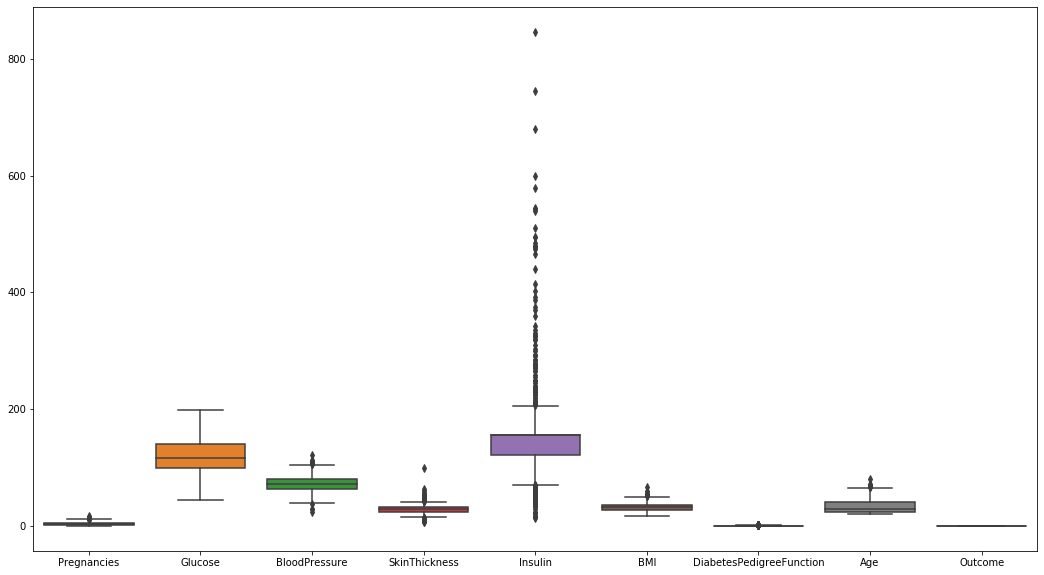

In [45]:
plt.figure(figsize=(18,10))
sns.boxplot(data = base3)

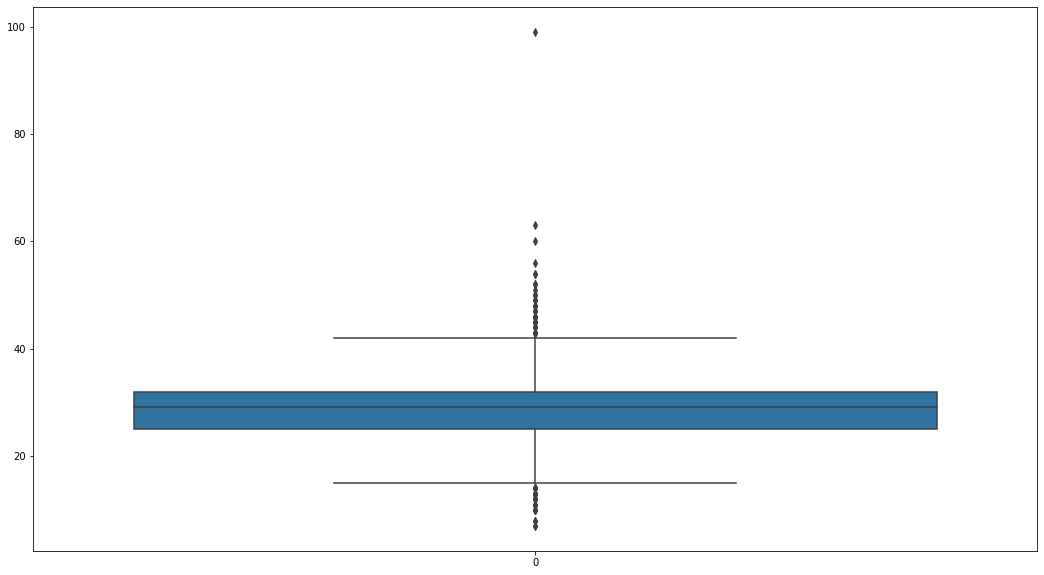

In [88]:
plt.figure(figsize=(18,10))
sns.boxplot(data = base3['SkinThickness'])

## 2.5 - Tratamento de Outliers

#### Substituindo os outliers, pela média dos dados.

Apenas para exemplo.

In [202]:
base3_2 = base3.copy()

In [203]:
d = base3_2.describe()
q1 = d.iloc[4,3] #primeiro quartil - " SkinThickness "
q3 = d.iloc[6,3] #terceiro quartil - " SkinThickness "
iqr = q3 - q1    #Intervalo Interquartil
minimo = q1 - (1.5 * iqr)
maximo = q3 + (1.5 * iqr)

In [204]:
media = base3_2['SkinThickness'] .mean()
media

29.153419593345607

In [205]:
for x,i in zip(base3_2['SkinThickness'], range(base3_2.shape[0])):
    if (x < minimo) | (x > maximo):
        base3_2.loc[i,'SkinThickness'] = media

In [206]:
base3_2.loc[0,'SkinThickness']

35.0

In [207]:
base3_2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.000000,148.0,72.0,35.00000,155.548223,33.6,0.627,50.0,1.0
1,1.000000,85.0,66.0,29.00000,155.548223,26.6,0.351,31.0,1.0
2,8.000000,183.0,64.0,29.15342,155.548223,23.3,0.672,32.0,1.0
3,1.000000,89.0,66.0,23.00000,94.000000,28.1,0.167,21.0,1.0
4,4.494673,137.0,40.0,35.00000,168.000000,43.1,2.288,33.0,1.0


In [212]:
base3_2['SkinThickness'].max()

42.0

#### Apagando os outliers

In [213]:
base3_3 = base3.copy()

In [214]:
d = base3_3.describe()
q1 = d.iloc[4,3] #primeiro quartil - " SkinThickness "
q3 = d.iloc[6,3] #terceiro quartil - " SkinThickness "
iqr = q3 - q1    #Intervalo Interquartil
minimo = q1 - (1.5 * iqr)
maximo = q3 + (1.5 * iqr)

In [215]:
outliers = base3_3[(base3_3['SkinThickness']>maximo)|(base3_3['SkinThickness']<minimo)]
outliers

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
8,2.000000,197.0,70.0,45.0,543.0,30.5,0.158,53.0,1.0
16,4.494673,118.0,84.0,47.0,230.0,45.8,0.551,31.0,1.0
32,3.000000,88.0,58.0,11.0,54.0,24.8,0.267,22.0,1.0
39,4.000000,111.0,72.0,47.0,207.0,37.1,1.390,56.0,1.0
50,1.000000,103.0,80.0,11.0,82.0,19.4,0.491,22.0,1.0
...,...,...,...,...,...,...,...,...,...
698,4.000000,127.0,88.0,11.0,155.0,34.5,0.598,28.0,1.0
710,3.000000,158.0,64.0,13.0,387.0,31.2,0.295,24.0,1.0
718,1.000000,108.0,60.0,46.0,178.0,35.5,0.415,24.0,1.0
753,4.494673,181.0,88.0,44.0,510.0,43.3,0.222,26.0,1.0


In [216]:
outliers.index

Int64Index([  8,  16,  32,  39,  50,  55,  57,  68,  80,  86,  99, 120, 130,
            134, 150, 155, 169, 177, 191, 197, 198, 211, 252, 254, 273, 275,
            279, 286, 289, 293, 307, 313, 316, 320, 335, 340, 353, 370, 374,
            375, 382, 385, 392, 393, 409, 422, 428, 432, 434, 444, 445, 446,
            447, 450, 458, 465, 466, 476, 519, 532, 539, 548, 565, 575, 579,
            580, 585, 591, 594, 595, 609, 617, 625, 639, 657, 661, 662, 663,
            665, 671, 689, 693, 698, 710, 718, 753, 763],
           dtype='int64')

In [218]:
base3_3 = base3_3.drop(outliers.index)

In [219]:
base3_3.shape

(681, 9)

#### <font color='grey'>Substituindo os outliers usando transformação logarítmica. /font>

## 2.6 - Apagar Colunas

In [220]:
# Lista todas as colunas
list(base3)

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [ ]:
nome_coluna = base.NomeDaColuna  #salvar essa coluna caso seja necessário
base = base.drop('NomeDaColuna', axis = 1)     #AXIS = 1 APAGA A COLUNA

# Fim

### Obrigado - Marcus Rosa Godoi - <a href="https://www.linkedin.com/in/marcus-godoi/">linkedin.com/in/marcus-godoi</a>